In [10]:
#Decision Tree Analysis for Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = pd.read_csv("data_test_two.csv")

In [12]:
dataset.shape

(1000, 31)

In [13]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,...,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933,blues
1,blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,...,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985,blues
2,blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,...,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005,blues
3,blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,...,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267,blues
4,blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,...,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891,blues


In [14]:
X = dataset.drop(['Filename','label'],axis=1) #Filename is not required
Y = dataset['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
Y_pred = classifier.predict(X_test)

In [23]:
#Have to remove filename and label for this to work and then point Y at the label for each
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[4 0 1 0 0 1 0 0 0 2]
 [0 9 1 1 0 1 0 0 0 0]
 [1 0 4 1 0 0 0 0 2 0]
 [0 0 2 5 1 0 1 0 0 0]
 [0 0 1 3 5 1 1 3 0 0]
 [1 1 1 0 0 4 1 1 0 0]
 [1 0 1 0 0 0 7 0 0 1]
 [0 0 0 1 0 1 0 8 1 0]
 [0 0 3 2 2 1 0 0 5 0]
 [1 0 1 0 1 0 0 1 1 1]]
              precision    recall  f1-score   support

       blues       0.50      0.50      0.50         8
   classical       0.90      0.75      0.82        12
     country       0.27      0.50      0.35         8
       disco       0.38      0.56      0.45         9
      hiphop       0.56      0.36      0.43        14
        jazz       0.44      0.44      0.44         9
       metal       0.70      0.70      0.70        10
         pop       0.62      0.73      0.67        11
      reggae       0.56      0.38      0.45        13
        rock       0.25      0.17      0.20         6

    accuracy                           0.52       100
   macro avg       0.52      0.51      0.50       100
weighted avg       0.55      0.52      0.52       100



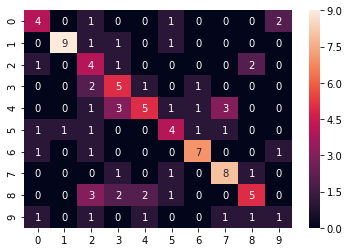

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)

In [25]:
#Decision Tree Analysis for Regression
dataset2 = pd.read_csv("data_test_two.csv")

In [26]:
dataset2

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,...,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933,blues
1,blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,...,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985,blues
2,blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,...,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005,blues
3,blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,...,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267,blues
4,blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,...,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891,blues
5,blues.00005.wav,0.265523,0.078779,30.561682,1513.328291,0.000586,1545.490618,0.015439,2875.332613,0.073996,...,-5.041521,-12.399594,-13.481972,-5.546961,-7.549344,-2.157791,-4.669054,-5.308126,-11.258170,blues
6,blues.00006.wav,0.254311,0.109664,30.890941,1145.755065,0.000196,1214.084741,-0.028623,2288.361163,0.056807,...,-4.880396,-8.586984,-13.354753,-10.079572,-14.145937,-14.757613,-9.688439,-4.972361,-8.607906,blues
7,blues.00007.wav,0.269021,0.099818,29.627338,1154.687121,0.000298,1396.025197,-0.025248,2349.544126,0.047211,...,-10.341427,-3.978712,-9.801023,-11.270885,-12.219318,-14.790883,-14.485509,-8.179283,-12.457853,blues
8,blues.00008.wav,0.372944,0.109156,28.785792,1332.261464,0.000292,1809.549485,0.019990,2866.499333,0.047101,...,5.496655,-11.706227,3.229072,-2.763687,-6.007565,-5.540375,2.960684,7.256684,-3.030926,blues
9,blues.00009.wav,0.238587,0.063637,27.988616,1508.097045,0.000665,1828.410837,0.002759,3334.704835,0.061107,...,1.599311,1.685762,-8.053340,0.238462,-2.820112,-2.154358,-2.951769,1.633783,-4.941733,blues


In [27]:
dataset2.describe()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.333170,0.093429,26.858281,1751.852193,0.004795,1976.391038,0.002693,3690.915899,0.077059,-214.423790,...,-6.419502,5.724268,-5.402651,2.496866,-4.625561,1.617107,-4.803964,0.879838,-2.998892,-1.197808
std,0.068632,0.046011,3.124805,601.522888,0.011511,490.293416,0.013064,1429.690844,0.032975,93.303535,...,6.783498,7.294746,6.420117,6.137700,5.561395,5.900692,5.422455,5.616104,4.897290,5.737915
min,0.168503,0.004786,16.145770,439.129276,0.000009,748.087477,-0.056817,643.521109,0.012361,-595.157104,...,-34.519875,-17.169533,-29.783953,-16.076685,-21.920017,-18.993584,-21.908558,-15.023964,-20.534409,-25.400860
25%,0.283503,0.060688,24.783428,1240.103400,0.000446,1614.056496,-0.005262,2460.870536,0.052362,-269.700760,...,-11.323158,0.651697,-9.880047,-1.666956,-8.316156,-1.935053,-8.429702,-2.727615,-6.121026,-4.936768
50%,0.332275,0.087042,26.764932,1758.225508,0.001809,2025.381742,0.002928,3757.502279,0.072380,-195.321487,...,-6.648439,6.013866,-5.793390,2.518728,-4.950700,1.733292,-5.267792,0.763764,-3.108214,-1.565663
75%,0.374445,0.122142,28.871451,2176.113692,0.005397,2321.772532,0.011031,4713.833996,0.096995,-145.536682,...,-2.162718,11.095165,-1.196022,6.803452,-1.027034,5.470085,-1.474443,4.278270,0.017796,2.212895
max,0.608037,0.282542,35.911892,4537.019858,0.252005,3353.718981,0.042207,8025.718136,0.291544,-36.345001,...,16.976814,24.150690,14.146593,20.033194,16.499084,22.298786,17.950909,23.989403,25.946220,22.816999


In [28]:
X = dataset2.drop(['Filename','label'],axis=1) #Filename is not required
Y = dataset2['Chromagram'] 
#Has to be a float number for this type of decision tree otherwise use label

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
Y_pred = regressor.predict(X_test)

In [32]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
993,0.297712,0.297402
859,0.322412,0.322157
298,0.250067,0.249004
553,0.288828,0.288875
672,0.393069,0.392220
971,0.397564,0.397724
27,0.266204,0.265554
231,0.289715,0.290273
306,0.380803,0.381091
706,0.336237,0.337240


In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.000882387095780082
Mean Squared Error: 2.7832883053410992e-06
Root Mean Squared Error: 0.001668319005868212
